# Principal Component Analysis

*Dimensionality Reduction using Eigenvalue Decomposition*

---
* [Algorithm](../theory/pca.ipynb)
* [Implementation in Python](../pymlalgo/pca/pca.py)

---

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Tell python to look for modules in the current project directory

import os
import sys

module_path = os.path.abspath(os.path.join('..'))

if module_path not in sys.path:
    sys.path.append(module_path)

The demo uses the [Iris Dataset](https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html)  

PCA will reduce the 4-dimensional data to 2-dimensions and plot to visualize the three classes separately.

In [4]:
from sklearn.datasets import load_iris

iris_data = load_iris()
x = iris_data['data']
labels = iris_data['target']
print('n = {}, d = {}'.format(x.shape[0], x.shape[1]))

n = 150, d = 4


**Reduction using Power iteration**

After reduction, n = 150, d = 2


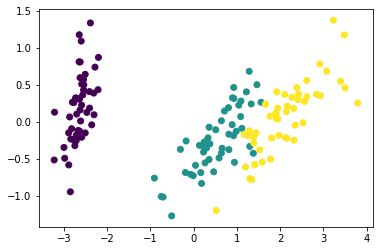

In [5]:
from pymlalgo.reduction.pca import PCA

pca_pi = PCA(x=x, method=PCA.POWER_ITERATION)
x_reduced_pi = pca_pi.reduce_dimensions(d_reduced=2)

print('After reduction, n = {}, d = {}'.format(x_reduced_pi.shape[0], x_reduced_pi.shape[1]))

plt.scatter(x_reduced_pi[:, 0], x_reduced_pi[:, 1], c=labels);

**Reduction using Oja Algorithm**

After reduction, n = 150, d = 2


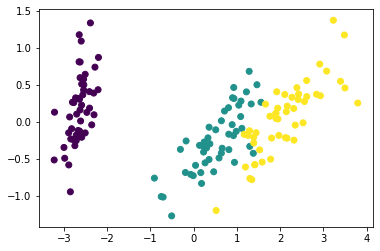

In [6]:
pca_oja = PCA(x=x, method=PCA.OJA)
x_reduced_oja = pca_oja.reduce_dimensions(d_reduced=2)

print('After reduction, n = {}, d = {}'.format(x_reduced_oja.shape[0], x_reduced_oja.shape[1]))

plt.scatter(x_reduced_oja[:, 0], x_reduced_oja[:, 1], c=labels);

**Comparison with `sklearn`**

In [7]:
from sklearn.decomposition import PCA

pca_sk = PCA(n_components=2)
x_reduced_sk = pca_sk.fit_transform(x)
print('After reduction, n = {}, d = {}'.format(x_reduced_sk.shape[0], x_reduced_sk.shape[1]))

pd.DataFrame({'projection_1_pi': x_reduced_pi[:, 0],
              'projection_1_oja': x_reduced_oja[:, 0],
              'projection_1_sk': x_reduced_sk[:, 0],
              'projection_2_pi': x_reduced_pi[:, 1] , 
              'projection_2_oja': x_reduced_oja[:, 1], 
              'projection_2_sk': x_reduced_sk[:, 1]})

After reduction, n = 150, d = 2


,projection_1_pi,projection_1_oja,projection_1_sk,projection_2_pi,projection_2_oja,projection_2_sk
0,-2.684126,-2.684126,-2.684126,0.319397,0.319397,0.319397
1,-2.714142,-2.714142,-2.714142,-0.177001,-0.177001,-0.177001
2,-2.888991,-2.888991,-2.888991,-0.144949,-0.144949,-0.144949
3,-2.745343,-2.745343,-2.745343,-0.318299,-0.318299,-0.318299
4,-2.728717,-2.728717,-2.728717,0.326755,0.326755,0.326755
5,-2.280860,-2.280860,-2.280860,0.741331,0.741330,0.741330
6,-2.820538,-2.820538,-2.820538,-0.089461,-0.089461,-0.089461
7,-2.626145,-2.626145,-2.626145,0.163385,0.163385,0.163385
8,-2.886383,-2.886383,-2.886383,-0.578312,-0.578312,-0.578312
9,-2.672756,-2.672756,-2.672756,-0.113774,-0.113774,-0.113774
